In [1]:
using Distributions
using PyPlot
using Statistics
using StatsBase

In [2]:
seps = 1
meps = 0
c = 1
phi = 0.5
n = 5000
X = ones(n)
eps = rand(Normal(meps, seps), n)
for i in 2:n
    X[i] = c + phi*X[i-1] + eps[i]
end

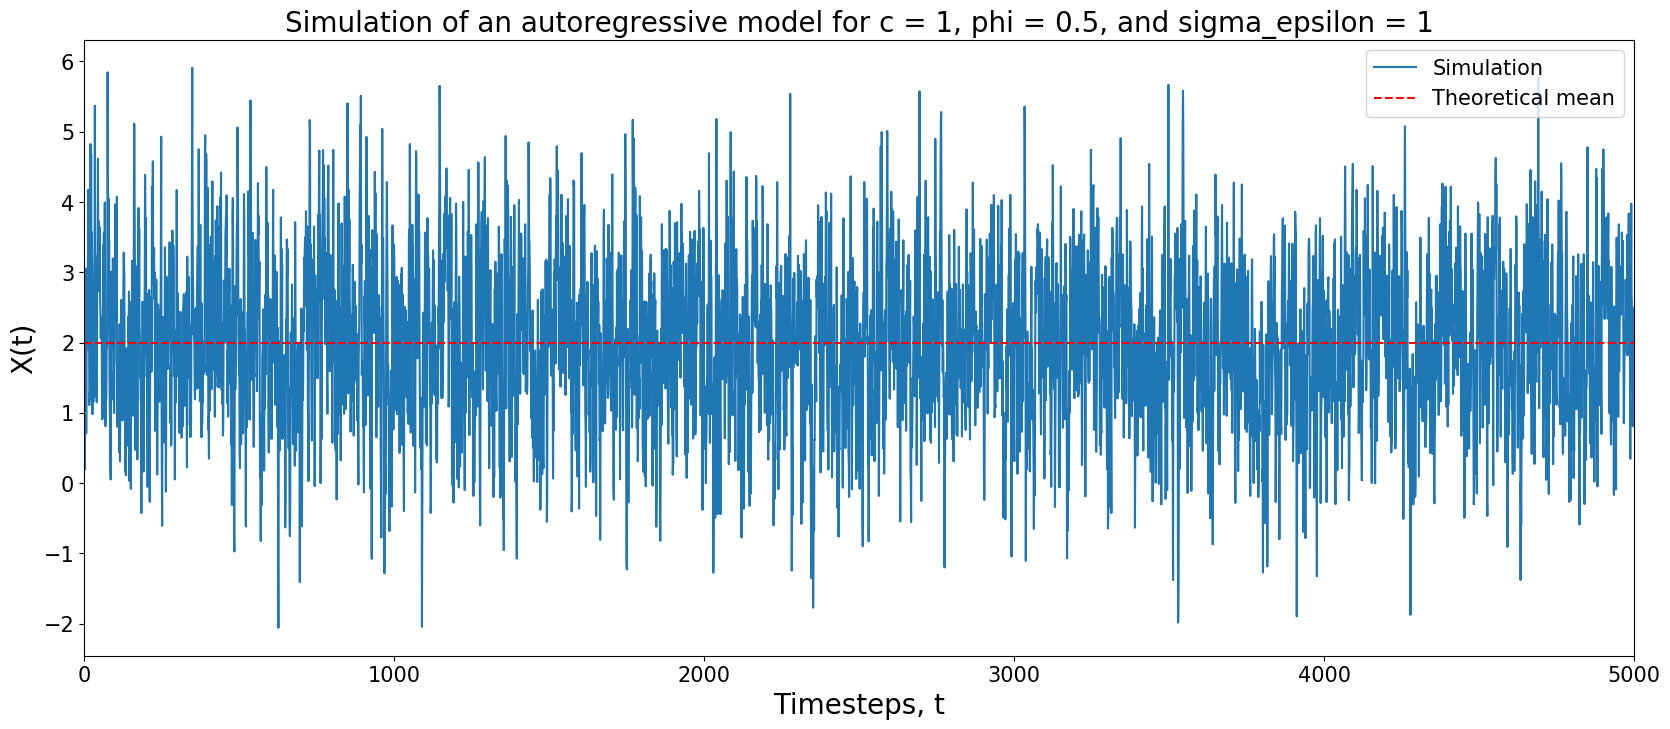

(0, 5000)

In [3]:
figure(figsize = (20, 8))
plot(X, label = "Simulation")
axhline([2], ls = "--", c = "r", label = "Theoretical mean")
# axhline([])
legend(fontsize = 15)
title("Simulation of an autoregressive model for c = 1, phi = 0.5, and sigma_epsilon = 1", fontsize = 20)
xlabel("Timesteps, t", fontsize = 20)
xticks(fontsize = 15)
ylabel("X(t)", fontsize = 20)
yticks(fontsize = 15)
xlim((0, 5000))

In [4]:
println("mean is ", mean(X))
println("theoretical mean is ", c/(1-phi))
println("variance is ", sum((X.-mean(X)).^2)/length(X))
println("theoretical variance is ", seps^2/(1-phi^2))

mean is 1.9871718996075025
theoretical mean is 2.0
variance is 1.3205201277467786
theoretical variance is 1.3333333333333333


The theoretical values and values calculated from the simulation are basically equal.

In [5]:
L = 30
ac = zeros(2*L+1) # autocovariance
for n in 1:2*L+1
    ac[n] = (seps^2/(1-phi^2))*phi^abs(n-L-1)
end

theac = autocov(X, 1:4999);

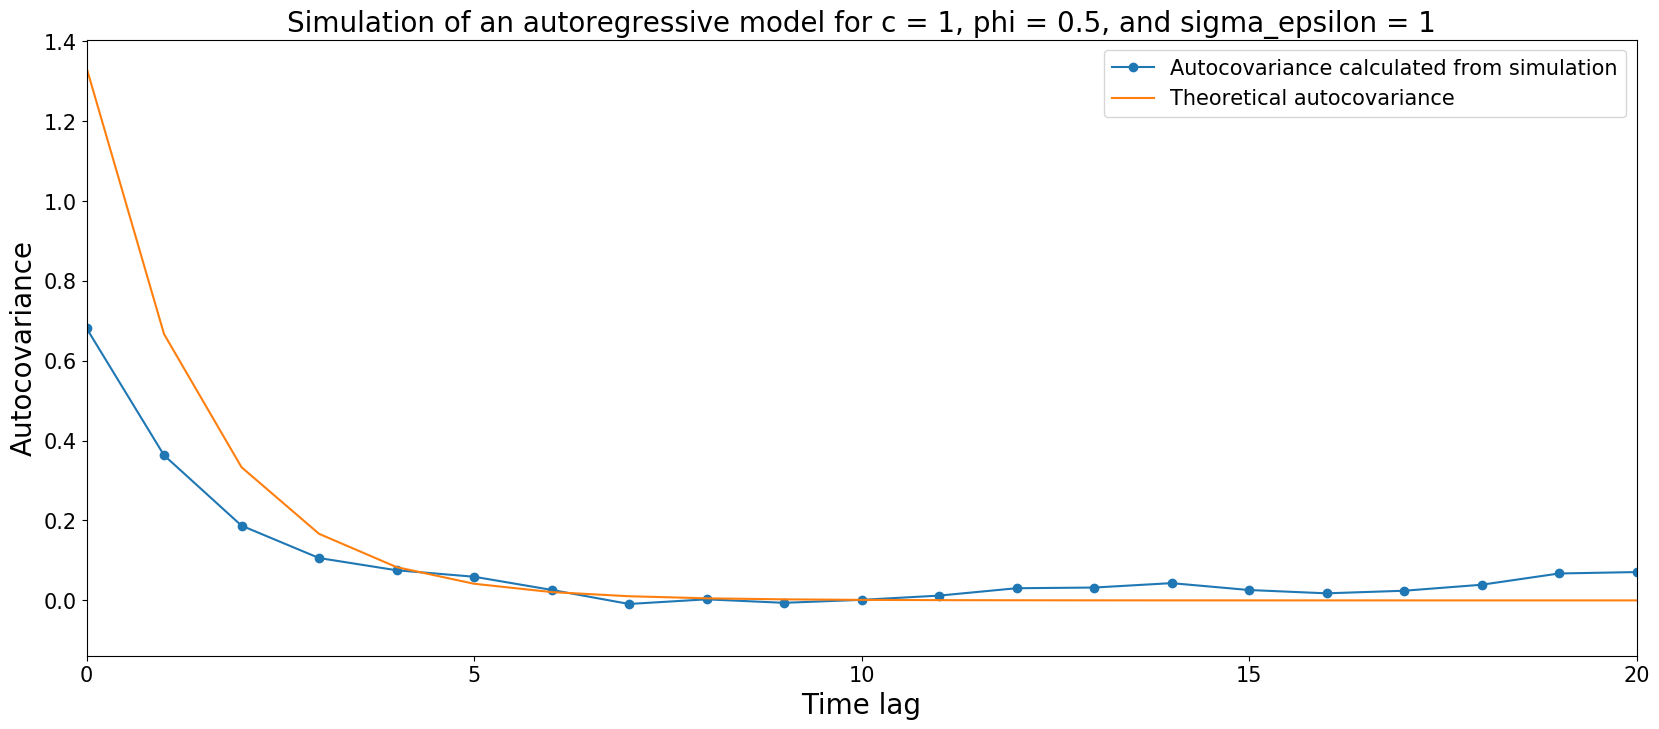

In [6]:
figure(figsize = (20, 8))
plot(theac, marker = "o", label = "Autocovariance calculated from simulation")
plot(-L:L, ac, label = "Theoretical autocovariance")
xlim((0, 20));
legend(fontsize = 15)
title("Simulation of an autoregressive model for c = 1, phi = 0.5, and sigma_epsilon = 1", fontsize = 20)
yticks(fontsize = 15)
xticks([0, 5, 10, 15, 20], fontsize = 15)
xlabel("Time lag", fontsize = 20)
ylabel("Autocovariance", fontsize = 20);

It looks similar but the calculated autocovariance isn't a perfectly monotonic line, as it is driven by noise. The gradients are flatter for larger phi.